In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_with_columns = pd.read_pickle("pickle_files/X_2021.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z_2021.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y_2021.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games_2021.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [   0    2    3    4    6    7    9   11   12   13   16   17   19   20
   21   22   23   24   25   26   28   29   30   32   33   35   36   37
   38   40   41   42   43   44   46   47   48   50   51   53   54   56
   57   59   61   62   63   65   66   67   68   69   71   72   73   74
   76   78   79   80   83   84   86   87   88   89   90   91   92   93
   94   95   96   98   99  100  101  102  104  105  106  107  109  110
  111  112  113  114  115  116  118  119  120  121  123  125  126  127
  128  129  130  131  132  133  134  135  136  137  138  139  140  143
  144  145  146  147  148  149  150  151  153  154  155  157  158  160
  162  163  164  165  166  167  168  169  170  171  172  173  174  176
  177  178  179  180  181  182  185  188  189  190  191  193  194  195
  197  199  200  201  203  205  206  207  208  209  210  212  213  214
  215  216  217  218  219  220  221  222  223  225  226  227  228  229
  230  232  234  235  236  237  238  239  241  242  243  244  245  246

## XGBoost

In [5]:
#XGB_model = xgb.XGBClassifier(silent=False, 
#                      learning_rate=0.005,  
#                      colsample_bytree = 0.5,
#                      subsample = 0.8,
#                      objective='multi:softprob', 
#                      n_estimators=1000, 
#                      reg_alpha = 0.2,
#                      reg_lambda = .5,
#                      max_depth=5, 
#                      gamma=5,
#                      seed=82)

XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 50,
                      reg_lambda = .5,
                      max_depth=5, 
                      gamma=0,
                      seed=82)


# add max_delta_step=3  to handle imbalanced class with draws
# max depth was 5. I changed to 4.

In [6]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[14:32:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.07358	validation_0-mlogloss:1.09462	validation_1-merror:0.05017	validation_1-mlogloss:1.09460
[1]	validation_0-merror:0.07358	validation_0-mlogloss:1.08971	validation_1-merror:0.05017	validation_1-mlogloss:1.08960
[2]	validation_0-merror:0.07358	validation_0-mlogloss:1.08484	validation_1-merror:0.05017	validation_1-mlogloss:1.08464
[3]	validation_0-merror:0.07358	validation_0-mlogloss:1.08083	validation_1-merror:0.05017	validation_1-mlogloss:1.08075
[4]	validation_0-merror:0.07358	validation_0-mlogloss:1.07691	validation_1-merror:0.05017	validation_1-mlogloss:1.07696
[5]	validation_0-merror:0.07246	validation_

[64]	validation_0-merror:0.07358	validation_0-mlogloss:0.86249	validation_1-merror:0.05017	validation_1-mlogloss:0.86110
[65]	validation_0-merror:0.07358	validation_0-mlogloss:0.85992	validation_1-merror:0.05017	validation_1-mlogloss:0.85854
[66]	validation_0-merror:0.07358	validation_0-mlogloss:0.85671	validation_1-merror:0.05017	validation_1-mlogloss:0.85526
[67]	validation_0-merror:0.07358	validation_0-mlogloss:0.85349	validation_1-merror:0.05017	validation_1-mlogloss:0.85197
[68]	validation_0-merror:0.07358	validation_0-mlogloss:0.85100	validation_1-merror:0.05017	validation_1-mlogloss:0.84947
[69]	validation_0-merror:0.07358	validation_0-mlogloss:0.84849	validation_1-merror:0.05017	validation_1-mlogloss:0.84697
[70]	validation_0-merror:0.07358	validation_0-mlogloss:0.84536	validation_1-merror:0.05017	validation_1-mlogloss:0.84377
[71]	validation_0-merror:0.07358	validation_0-mlogloss:0.84286	validation_1-merror:0.05017	validation_1-mlogloss:0.84130
[72]	validation_0-merror:0.07358

[131]	validation_0-merror:0.07358	validation_0-mlogloss:0.69981	validation_1-merror:0.05017	validation_1-mlogloss:0.69631
[132]	validation_0-merror:0.07358	validation_0-mlogloss:0.69760	validation_1-merror:0.05017	validation_1-mlogloss:0.69405
[133]	validation_0-merror:0.07358	validation_0-mlogloss:0.69542	validation_1-merror:0.05017	validation_1-mlogloss:0.69181
[134]	validation_0-merror:0.07358	validation_0-mlogloss:0.69376	validation_1-merror:0.05017	validation_1-mlogloss:0.69019
[135]	validation_0-merror:0.07358	validation_0-mlogloss:0.69160	validation_1-merror:0.05017	validation_1-mlogloss:0.68797
[136]	validation_0-merror:0.07358	validation_0-mlogloss:0.68992	validation_1-merror:0.05017	validation_1-mlogloss:0.68628
[137]	validation_0-merror:0.07358	validation_0-mlogloss:0.68875	validation_1-merror:0.05017	validation_1-mlogloss:0.68516
[138]	validation_0-merror:0.07358	validation_0-mlogloss:0.68713	validation_1-merror:0.05017	validation_1-mlogloss:0.68355
[139]	validation_0-merro

[199]	validation_0-merror:0.07358	validation_0-mlogloss:0.59057	validation_1-merror:0.05017	validation_1-mlogloss:0.58566
[200]	validation_0-merror:0.07358	validation_0-mlogloss:0.58896	validation_1-merror:0.05017	validation_1-mlogloss:0.58401
[201]	validation_0-merror:0.07358	validation_0-mlogloss:0.58820	validation_1-merror:0.05017	validation_1-mlogloss:0.58328
[202]	validation_0-merror:0.07358	validation_0-mlogloss:0.58704	validation_1-merror:0.05017	validation_1-mlogloss:0.58212
[203]	validation_0-merror:0.07358	validation_0-mlogloss:0.58549	validation_1-merror:0.05017	validation_1-mlogloss:0.58054
[204]	validation_0-merror:0.07358	validation_0-mlogloss:0.58393	validation_1-merror:0.05017	validation_1-mlogloss:0.57893
[205]	validation_0-merror:0.07358	validation_0-mlogloss:0.58275	validation_1-merror:0.05017	validation_1-mlogloss:0.57772
[206]	validation_0-merror:0.07358	validation_0-mlogloss:0.58119	validation_1-merror:0.05017	validation_1-mlogloss:0.57612
[207]	validation_0-merro

[267]	validation_0-merror:0.07358	validation_0-mlogloss:0.50936	validation_1-merror:0.05017	validation_1-mlogloss:0.50280
[268]	validation_0-merror:0.07358	validation_0-mlogloss:0.50819	validation_1-merror:0.05017	validation_1-mlogloss:0.50160
[269]	validation_0-merror:0.07358	validation_0-mlogloss:0.50738	validation_1-merror:0.05017	validation_1-mlogloss:0.50078
[270]	validation_0-merror:0.07358	validation_0-mlogloss:0.50625	validation_1-merror:0.05017	validation_1-mlogloss:0.49962
[271]	validation_0-merror:0.07358	validation_0-mlogloss:0.50512	validation_1-merror:0.05017	validation_1-mlogloss:0.49846
[272]	validation_0-merror:0.07358	validation_0-mlogloss:0.50433	validation_1-merror:0.05017	validation_1-mlogloss:0.49762
[273]	validation_0-merror:0.07358	validation_0-mlogloss:0.50321	validation_1-merror:0.05017	validation_1-mlogloss:0.49647
[274]	validation_0-merror:0.07358	validation_0-mlogloss:0.50241	validation_1-merror:0.05017	validation_1-mlogloss:0.49565
[275]	validation_0-merro

[335]	validation_0-merror:0.07358	validation_0-mlogloss:0.45047	validation_1-merror:0.05017	validation_1-mlogloss:0.44249
[336]	validation_0-merror:0.07358	validation_0-mlogloss:0.44961	validation_1-merror:0.05017	validation_1-mlogloss:0.44161
[337]	validation_0-merror:0.07358	validation_0-mlogloss:0.44903	validation_1-merror:0.05017	validation_1-mlogloss:0.44100
[338]	validation_0-merror:0.07358	validation_0-mlogloss:0.44847	validation_1-merror:0.05017	validation_1-mlogloss:0.44044
[339]	validation_0-merror:0.07358	validation_0-mlogloss:0.44764	validation_1-merror:0.05017	validation_1-mlogloss:0.43959
[340]	validation_0-merror:0.07358	validation_0-mlogloss:0.44708	validation_1-merror:0.05017	validation_1-mlogloss:0.43902
[341]	validation_0-merror:0.07358	validation_0-mlogloss:0.44653	validation_1-merror:0.05017	validation_1-mlogloss:0.43846
[342]	validation_0-merror:0.07358	validation_0-mlogloss:0.44570	validation_1-merror:0.05017	validation_1-mlogloss:0.43761
[343]	validation_0-merro

[403]	validation_0-merror:0.07358	validation_0-mlogloss:0.40831	validation_1-merror:0.05017	validation_1-mlogloss:0.39947
[404]	validation_0-merror:0.07358	validation_0-mlogloss:0.40767	validation_1-merror:0.05017	validation_1-mlogloss:0.39881
[405]	validation_0-merror:0.07358	validation_0-mlogloss:0.40703	validation_1-merror:0.05017	validation_1-mlogloss:0.39816
[406]	validation_0-merror:0.07358	validation_0-mlogloss:0.40638	validation_1-merror:0.05017	validation_1-mlogloss:0.39749
[407]	validation_0-merror:0.07358	validation_0-mlogloss:0.40597	validation_1-merror:0.05017	validation_1-mlogloss:0.39709
[408]	validation_0-merror:0.07358	validation_0-mlogloss:0.40556	validation_1-merror:0.05017	validation_1-mlogloss:0.39666
[409]	validation_0-merror:0.07358	validation_0-mlogloss:0.40516	validation_1-merror:0.05017	validation_1-mlogloss:0.39626
[410]	validation_0-merror:0.07358	validation_0-mlogloss:0.40474	validation_1-merror:0.05017	validation_1-mlogloss:0.39582
[411]	validation_0-merro

[470]	validation_0-merror:0.07358	validation_0-mlogloss:0.37603	validation_1-merror:0.05017	validation_1-mlogloss:0.36645
[471]	validation_0-merror:0.07358	validation_0-mlogloss:0.37555	validation_1-merror:0.05017	validation_1-mlogloss:0.36595
[472]	validation_0-merror:0.07358	validation_0-mlogloss:0.37504	validation_1-merror:0.05017	validation_1-mlogloss:0.36544
[473]	validation_0-merror:0.07358	validation_0-mlogloss:0.37455	validation_1-merror:0.05017	validation_1-mlogloss:0.36493
[474]	validation_0-merror:0.07358	validation_0-mlogloss:0.37407	validation_1-merror:0.05017	validation_1-mlogloss:0.36444
[475]	validation_0-merror:0.07358	validation_0-mlogloss:0.37395	validation_1-merror:0.05017	validation_1-mlogloss:0.36434
[476]	validation_0-merror:0.07358	validation_0-mlogloss:0.37365	validation_1-merror:0.05017	validation_1-mlogloss:0.36405
[477]	validation_0-merror:0.07358	validation_0-mlogloss:0.37315	validation_1-merror:0.05017	validation_1-mlogloss:0.36353
[478]	validation_0-merro

[538]	validation_0-merror:0.07358	validation_0-mlogloss:0.35065	validation_1-merror:0.05017	validation_1-mlogloss:0.34067
[539]	validation_0-merror:0.07358	validation_0-mlogloss:0.35044	validation_1-merror:0.05017	validation_1-mlogloss:0.34047
[540]	validation_0-merror:0.07358	validation_0-mlogloss:0.35019	validation_1-merror:0.05017	validation_1-mlogloss:0.34022
[541]	validation_0-merror:0.07358	validation_0-mlogloss:0.34981	validation_1-merror:0.05017	validation_1-mlogloss:0.33983
[542]	validation_0-merror:0.07358	validation_0-mlogloss:0.34944	validation_1-merror:0.05017	validation_1-mlogloss:0.33945
[543]	validation_0-merror:0.07358	validation_0-mlogloss:0.34907	validation_1-merror:0.05017	validation_1-mlogloss:0.33906
[544]	validation_0-merror:0.07358	validation_0-mlogloss:0.34871	validation_1-merror:0.05017	validation_1-mlogloss:0.33870
[545]	validation_0-merror:0.07358	validation_0-mlogloss:0.34847	validation_1-merror:0.05017	validation_1-mlogloss:0.33847
[546]	validation_0-merro

[606]	validation_0-merror:0.05909	validation_0-mlogloss:0.33083	validation_1-merror:0.04682	validation_1-mlogloss:0.32056
[607]	validation_0-merror:0.05909	validation_0-mlogloss:0.33055	validation_1-merror:0.04682	validation_1-mlogloss:0.32028
[608]	validation_0-merror:0.05909	validation_0-mlogloss:0.33025	validation_1-merror:0.04682	validation_1-mlogloss:0.31997
[609]	validation_0-merror:0.05909	validation_0-mlogloss:0.32995	validation_1-merror:0.04682	validation_1-mlogloss:0.31966
[610]	validation_0-merror:0.05909	validation_0-mlogloss:0.32992	validation_1-merror:0.04682	validation_1-mlogloss:0.31963
[611]	validation_0-merror:0.05797	validation_0-mlogloss:0.32961	validation_1-merror:0.04682	validation_1-mlogloss:0.31932
[612]	validation_0-merror:0.05797	validation_0-mlogloss:0.32933	validation_1-merror:0.04682	validation_1-mlogloss:0.31903
[613]	validation_0-merror:0.05797	validation_0-mlogloss:0.32916	validation_1-merror:0.04682	validation_1-mlogloss:0.31887
[614]	validation_0-merro

[674]	validation_0-merror:0.05351	validation_0-mlogloss:0.31688	validation_1-merror:0.04682	validation_1-mlogloss:0.30641
[675]	validation_0-merror:0.05351	validation_0-mlogloss:0.31673	validation_1-merror:0.04682	validation_1-mlogloss:0.30628
[676]	validation_0-merror:0.05351	validation_0-mlogloss:0.31659	validation_1-merror:0.04682	validation_1-mlogloss:0.30615
[677]	validation_0-merror:0.05351	validation_0-mlogloss:0.31636	validation_1-merror:0.04682	validation_1-mlogloss:0.30590
[678]	validation_0-merror:0.05351	validation_0-mlogloss:0.31633	validation_1-merror:0.04682	validation_1-mlogloss:0.30589
[679]	validation_0-merror:0.05351	validation_0-mlogloss:0.31609	validation_1-merror:0.04682	validation_1-mlogloss:0.30563
[680]	validation_0-merror:0.05351	validation_0-mlogloss:0.31583	validation_1-merror:0.04682	validation_1-mlogloss:0.30537
[681]	validation_0-merror:0.05351	validation_0-mlogloss:0.31560	validation_1-merror:0.04682	validation_1-mlogloss:0.30513
[682]	validation_0-merro

[742]	validation_0-merror:0.05128	validation_0-mlogloss:0.30464	validation_1-merror:0.04682	validation_1-mlogloss:0.29385
[743]	validation_0-merror:0.05128	validation_0-mlogloss:0.30455	validation_1-merror:0.04682	validation_1-mlogloss:0.29375
[744]	validation_0-merror:0.05128	validation_0-mlogloss:0.30437	validation_1-merror:0.04682	validation_1-mlogloss:0.29356
[745]	validation_0-merror:0.05128	validation_0-mlogloss:0.30417	validation_1-merror:0.04682	validation_1-mlogloss:0.29336
[746]	validation_0-merror:0.05128	validation_0-mlogloss:0.30398	validation_1-merror:0.04682	validation_1-mlogloss:0.29315
[747]	validation_0-merror:0.05128	validation_0-mlogloss:0.30377	validation_1-merror:0.04682	validation_1-mlogloss:0.29294
[748]	validation_0-merror:0.05128	validation_0-mlogloss:0.30356	validation_1-merror:0.04682	validation_1-mlogloss:0.29272
[749]	validation_0-merror:0.05128	validation_0-mlogloss:0.30347	validation_1-merror:0.04682	validation_1-mlogloss:0.29261
[750]	validation_0-merro

[810]	validation_0-merror:0.05128	validation_0-mlogloss:0.29489	validation_1-merror:0.04682	validation_1-mlogloss:0.28370
[811]	validation_0-merror:0.05128	validation_0-mlogloss:0.29479	validation_1-merror:0.04682	validation_1-mlogloss:0.28361
[812]	validation_0-merror:0.05128	validation_0-mlogloss:0.29463	validation_1-merror:0.04682	validation_1-mlogloss:0.28343
[813]	validation_0-merror:0.05128	validation_0-mlogloss:0.29448	validation_1-merror:0.04682	validation_1-mlogloss:0.28328
[814]	validation_0-merror:0.05128	validation_0-mlogloss:0.29431	validation_1-merror:0.04682	validation_1-mlogloss:0.28310
[815]	validation_0-merror:0.05128	validation_0-mlogloss:0.29414	validation_1-merror:0.04682	validation_1-mlogloss:0.28293
[816]	validation_0-merror:0.05128	validation_0-mlogloss:0.29398	validation_1-merror:0.04682	validation_1-mlogloss:0.28277
[817]	validation_0-merror:0.05128	validation_0-mlogloss:0.29383	validation_1-merror:0.04682	validation_1-mlogloss:0.28260
[818]	validation_0-merro

[878]	validation_0-merror:0.05128	validation_0-mlogloss:0.28668	validation_1-merror:0.04682	validation_1-mlogloss:0.27511
[879]	validation_0-merror:0.05128	validation_0-mlogloss:0.28662	validation_1-merror:0.04682	validation_1-mlogloss:0.27504
[880]	validation_0-merror:0.05128	validation_0-mlogloss:0.28648	validation_1-merror:0.04682	validation_1-mlogloss:0.27489
[881]	validation_0-merror:0.05128	validation_0-mlogloss:0.28640	validation_1-merror:0.04682	validation_1-mlogloss:0.27482
[882]	validation_0-merror:0.05128	validation_0-mlogloss:0.28640	validation_1-merror:0.04682	validation_1-mlogloss:0.27482
[883]	validation_0-merror:0.05128	validation_0-mlogloss:0.28625	validation_1-merror:0.04682	validation_1-mlogloss:0.27467
[884]	validation_0-merror:0.05128	validation_0-mlogloss:0.28613	validation_1-merror:0.04682	validation_1-mlogloss:0.27453
[885]	validation_0-merror:0.05128	validation_0-mlogloss:0.28597	validation_1-merror:0.04682	validation_1-mlogloss:0.27437
[886]	validation_0-merro

[946]	validation_0-merror:0.05128	validation_0-mlogloss:0.27980	validation_1-merror:0.04682	validation_1-mlogloss:0.26796
[947]	validation_0-merror:0.05017	validation_0-mlogloss:0.27966	validation_1-merror:0.04682	validation_1-mlogloss:0.26782
[948]	validation_0-merror:0.05017	validation_0-mlogloss:0.27954	validation_1-merror:0.04682	validation_1-mlogloss:0.26769
[949]	validation_0-merror:0.05017	validation_0-mlogloss:0.27942	validation_1-merror:0.04682	validation_1-mlogloss:0.26756
[950]	validation_0-merror:0.05017	validation_0-mlogloss:0.27929	validation_1-merror:0.04682	validation_1-mlogloss:0.26742
[951]	validation_0-merror:0.05017	validation_0-mlogloss:0.27918	validation_1-merror:0.04682	validation_1-mlogloss:0.26731
[952]	validation_0-merror:0.05017	validation_0-mlogloss:0.27905	validation_1-merror:0.04682	validation_1-mlogloss:0.26717
[953]	validation_0-merror:0.05017	validation_0-mlogloss:0.27894	validation_1-merror:0.04682	validation_1-mlogloss:0.26705
[954]	validation_0-merro

In [7]:
y_pred.shape

(299,)

In [8]:
pd.Series(y_pred).value_counts()

3.0    156
1.0    142
2.0      1
dtype: int64

## LogisticRegression

In [9]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [10]:
pd.Series(LR_y_pred).value_counts()

3.0    157
1.0    142
dtype: int64

## Comparison

In [11]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 94.98%
XGB Accuracy: 95.32%
LR train Accuracy: 91.19%
LR Accuracy: 90.97%


In [12]:
features_names = list(X_with_columns.columns)

In [13]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: ATGDIFF                             35.6%
Feature Importance: HTGDIFF                             33.12%
Feature Importance: homeTeamScore.minutesInFront        12.18%
Feature Importance: awayTeamScore.minutesInFront        11.02%
Feature Importance: homeTeamScoreChart.goals            2.64%
Feature Importance: awayTeamScore.matchScore.totalScore 2.36%
Feature Importance: homeTeamScore.matchScore.totalScore 1.58%
Feature Importance: awayTeamScoreChart.goals            1.37%
Feature Importance: AVGHTGDIFF                          0.13%
Feature Importance: round.year                          0.0%


In [14]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['awayTeamScore.matchScore.totalScore',
 'homeTeamScore.matchScore.totalScore',
 'awayTeamScoreChart.goals',
 'AVGHTGDIFF',
 'round.year']

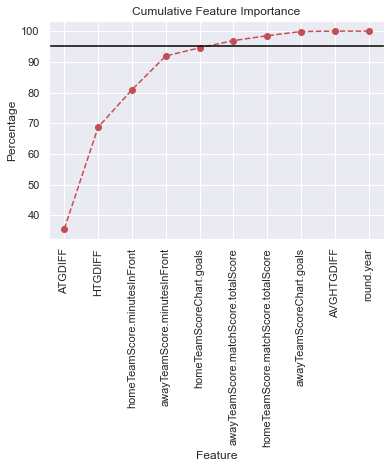

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.2        0.73333333 0.06666667]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

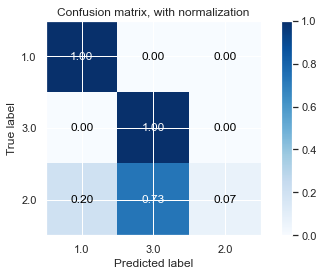

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 95.32%


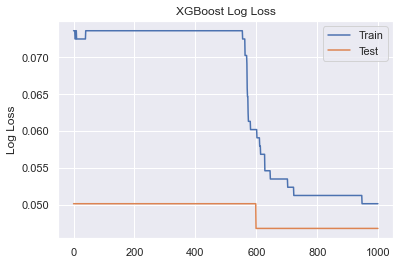

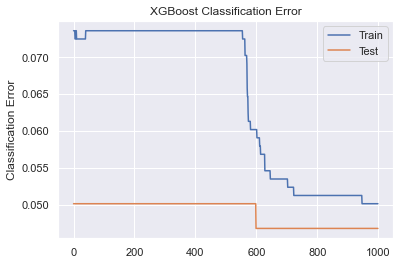

In [19]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [20]:
z_pred = XGB_model.predict(Z)

In [21]:
xgb_df_next_games = df_next_games.copy()

In [22]:
xgb_df_next_games['predicted_result'] = z_pred

In [23]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,homeTeamScore.matchScore.totalScore,awayTeamScore.matchScore.totalScore,predicted_result
0,Richmond,Carlton,105,80,3.0
1,Collingwood,Western Bulldogs,53,69,1.0
2,Melbourne,Fremantle,80,58,3.0
3,Adelaide Crows,Geelong Cats,103,91,3.0
4,Essendon,Hawthorn,91,92,1.0
5,Brisbane Lions,Sydney Swans,94,125,3.0
6,North Melbourne,Port Adelaide,65,117,1.0
7,GWS Giants,St Kilda,78,86,1.0
8,West Coast Eagles,Gold Coast Suns,83,58,1.0


In [24]:
 z_pred_prob = XGB_model.predict_proba(Z)

In [25]:
xgb_df_next_games['prob_loss'] = z_pred_prob[:,0]
xgb_df_next_games['prob_draw'] = z_pred_prob[:,1]
xgb_df_next_games['prob_win'] = z_pred_prob[:,2]

In [26]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,homeTeamScore.matchScore.totalScore,awayTeamScore.matchScore.totalScore,predicted_result,prob_loss,prob_draw,prob_win
0,Richmond,Carlton,105,80,3.0,0.091415,0.123770,0.784815
1,Collingwood,Western Bulldogs,53,69,1.0,0.732439,0.148409,0.119152
2,Melbourne,Fremantle,80,58,3.0,0.094674,0.105444,0.799882
3,Adelaide Crows,Geelong Cats,103,91,3.0,0.213292,0.288782,0.497926
4,Essendon,Hawthorn,91,92,1.0,0.729466,0.148008,0.122526
5,Brisbane Lions,Sydney Swans,94,125,3.0,0.091415,0.123770,0.784815
6,North Melbourne,Port Adelaide,65,117,1.0,0.475905,0.196126,0.327968
7,GWS Giants,St Kilda,78,86,1.0,0.732439,0.148409,0.119152
8,West Coast Eagles,Gold Coast Suns,83,58,1.0,0.732439,0.148409,0.119152


In [27]:
# if Home wins: 1 + log2(p)
# if Home loses: 1 + log2(1-p)
# ig Home draws: 1 + 0.5 * log2(p*(1-p))


#xgb_df_next_games['home_prob'] = np.where(xgb_df_next_games['predicted_result']==3,xgb_df_next_games['prob_win'],xgb_df_next_games['prob_loss'])



import math




xgb_df_next_games['home_win_score'] = 1 + np.log2(xgb_df_next_games['prob_win'])
xgb_df_next_games['home_loss_score'] = 1 + np.log2(1-xgb_df_next_games['prob_win'])
xgb_df_next_games['home_draw_score'] = 1 + 0.5*np.log2( xgb_df_next_games['prob_win']*(1-xgb_df_next_games['prob_win']))





In [28]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,homeTeamScore.matchScore.totalScore,awayTeamScore.matchScore.totalScore,predicted_result,prob_loss,prob_draw,prob_win,home_win_score,home_loss_score,home_draw_score
0,Richmond,Carlton,105,80,3.0,0.091415,0.123770,0.784815,0.650424,-1.216348,-0.282962
1,Collingwood,Western Bulldogs,53,69,1.0,0.732439,0.148409,0.119152,-2.069123,0.816965,-0.626079
2,Melbourne,Fremantle,80,58,3.0,0.094674,0.105444,0.799882,0.677859,-1.321077,-0.321609
3,Adelaide Crows,Geelong Cats,103,91,3.0,0.213292,0.288782,0.497926,-0.005998,0.005973,-0.000012
4,Essendon,Hawthorn,91,92,1.0,0.729466,0.148008,0.122526,-2.028842,0.811429,-0.608707
5,Brisbane Lions,Sydney Swans,94,125,3.0,0.091415,0.123770,0.784815,0.650424,-1.216348,-0.282962
6,North Melbourne,Port Adelaide,65,117,1.0,0.475905,0.196126,0.327968,-0.608372,0.426602,-0.090885
7,GWS Giants,St Kilda,78,86,1.0,0.732439,0.148409,0.119152,-2.069123,0.816965,-0.626079
8,West Coast Eagles,Gold Coast Suns,83,58,1.0,0.732439,0.148409,0.119152,-2.069123,0.816965,-0.626079


In [29]:
xgb_df_next_games.to_csv('data/2021_R1_Pred.csv')